<a href="https://colab.research.google.com/github/gr3g-z/CreditAnalisys-FraudDetection/blob/main/CreditAnalisys%26Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método Uilizado (CRISP-DM)

* Abordagem comumente utilizada por especialistas em mineração de dados para atacar problemas

<p align="center">
<img src = "https://www.escoladnc.com.br/blog/wp-content/webp-express/webp-images/uploads/2020/10/crispdm.png.webp" width="70%"/>
</p>




# Detecção de Fraude


## Contexto

Texto e Dataset retirado da plataforma Kaglle

- There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.
We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

- PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

- This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for Kaggle.

link:

## Descrição do Dataset

* [ step ] - Faz juz a uma unidade de tempo no mundo real. Neste caso 1 == 1 hora de tempo. Totalizando 744 steps (30 dias de simulação).

* [ type ] - (CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER).

* [ amount ] - Quantidade de dinheiro transacionado na moeda local.

* [ nameOrig ] - Cliente origem da transação.

* [ oldbalanceOrg ] - Balanço inicial da conta do rementente.

* [ newbalanceOrig ] - Balanço após a transação do rementente.

* [ nameDest ] - Cliente destinatário da transação.

* [ oldbalanceDest ] - Balanço inicial da conta do destinatário. Não existem informações sobre clientes que começam com "M" os (Merchants == Comerciantes).

* [ newbalanceDest ] - Balanço após a transação da conta do destinatário. Não existem informações sobre clientes que começam com "M" os (Merchants == Comerciantes).

* [ isFraud ] - Transações identificadas como fraudulentas. ex: tentativas de esvaziar as contas dos clientes em um curto periodo de tempo ou de uma vez só.

* [ isFlaggedFraud ] - Modelo de negócio que controla transferências massivas e as marca como fransferencias ilegais. ex: tentar transferir mais de 200.000 em uma única transação.



-------



* *DISCLAIMER:* Transações fraudulentas são canceladas, então para o uso de detecção de fraudes as colunas: (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest ) não devem ser usadas.

-----

## Bibliotecas e Frameworks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Entendimento, Tratamento e Limpeza dos Dados

In [2]:
df = pd.read_csv('/content/drive/MyDrive/creditFraud/PS_20174392719_1491204439457_log.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
print("Número de Registros:\t",df.shape[0])
print("Número de Features:\t",df.shape[1])

Número de Registros:	 6362620
Número de Features:	 11


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
# Número de transações iguais a zero
len(df[df.amount==0])

16

In [9]:
# Contagem de Fraudes
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
#Contagem da quantidade dos tipos de pagamentos
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

## Gráficos

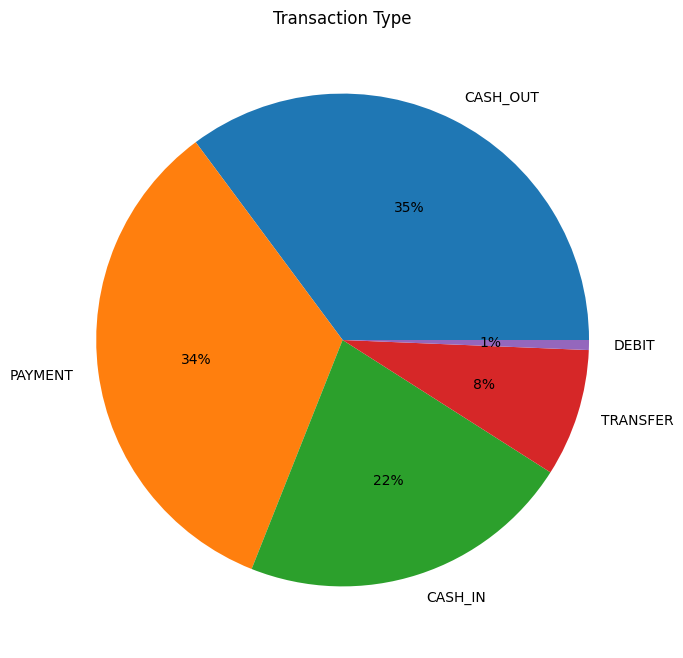

In [11]:
plt.figure(figsize=(10,8))
plt.pie(df.type.value_counts().values,labels=df.type.value_counts().index,  autopct='%.0f%%')
plt.title("Tipos de Transações")
plt.show()

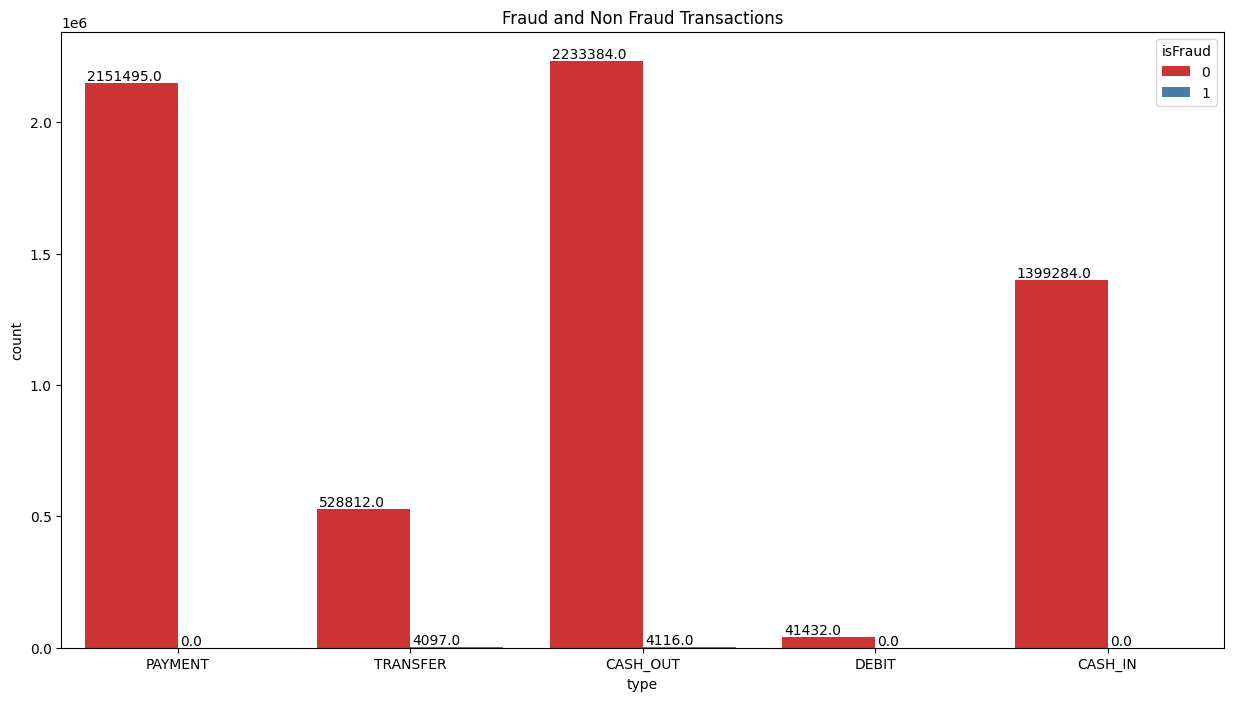

In [12]:
plt.figure(figsize = (15, 8))
ax=sns.countplot(data = df, x = "type", hue="isFraud", palette = 'Set1')
plt.title('Tipos de Transações com Fraude e Não Fraude')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

* Checking which type has the fraudulent transactions

In [13]:
fraud_size=df[df['isFraud'].isin([1])].groupby(['type']).size()
fraud_size

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64

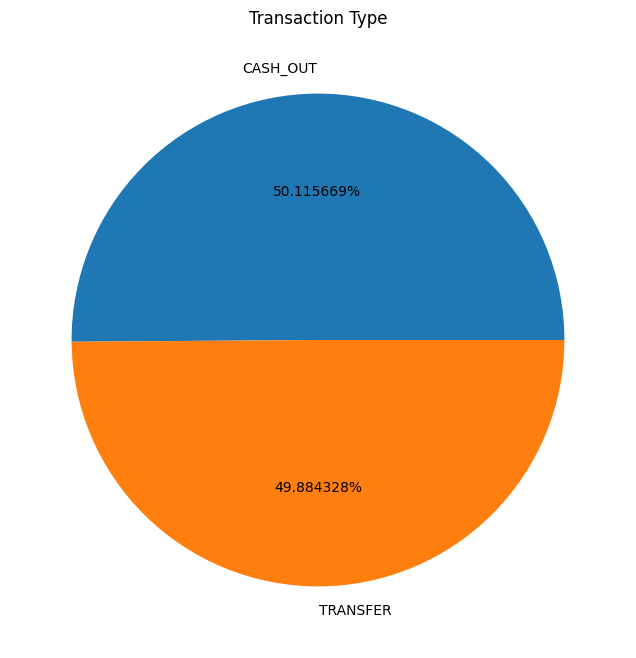

In [14]:
plt.figure(figsize=(10,8))
plt.pie(fraud_size.values,labels=fraud_size.index, autopct='%.6f%%')
plt.title("Tipos de Transação")
plt.show()

* Checando origem das transações fraudulentas

In [15]:
transfer_fraud = df[((df['type']=='TRANSFER') & df['isFraud']==1)]
transfer_fraud['nameOrig'].value_counts()

C1305486145    1
C202278158     1
C12585107      1
C946427395     1
C1069177491    1
              ..
C2090764492    1
C1794935564    1
C318078280     1
C939293281     1
C1685995037    1
Name: nameOrig, Length: 4097, dtype: int64

* Checando destino das transacões fraudulentas

In [16]:
cash_out_fraud = df[(df['type'] == 'CASH_OUT') & (df['isFraud'] == 1)]
cash_out_fraud['nameDest'].value_counts()

C200064275     2
C1399829166    2
C1650668671    2
C2129197098    2
C1013511446    2
              ..
C1566713324    1
C1955464150    1
C1104137869    1
C377165949     1
C873221189     1
Name: nameDest, Length: 4091, dtype: int64

In [17]:
#s = df[df['isFraud'].isin([1])].groupby(['step']).size()
#print("Step wise fraud transcations percentage: ",(fraud_step.count()/df['step'].unique().shape[0])*100)

Step wise fraud transcations percentage:  99.7308209959623


In [18]:
df_temp = df[df.isFlaggedFraud==1]
print("Quantas transações fraudulentas foram marcadas (flagged)?:")
print(len(df_temp))
print("Qual tipo de transação?")
print(df_temp['type'].value_counts().index[0])
print("Todas que foram marcadas são fraudes?")
print(df_temp['isFraud'].value_counts()[1] == len(df_temp))

How many frauds transactions are Flagged?:
16
What type of transactions are they?
TRANSFER
Are all these flagged also marked as Fraud Transactions?
True


## Machine Learning

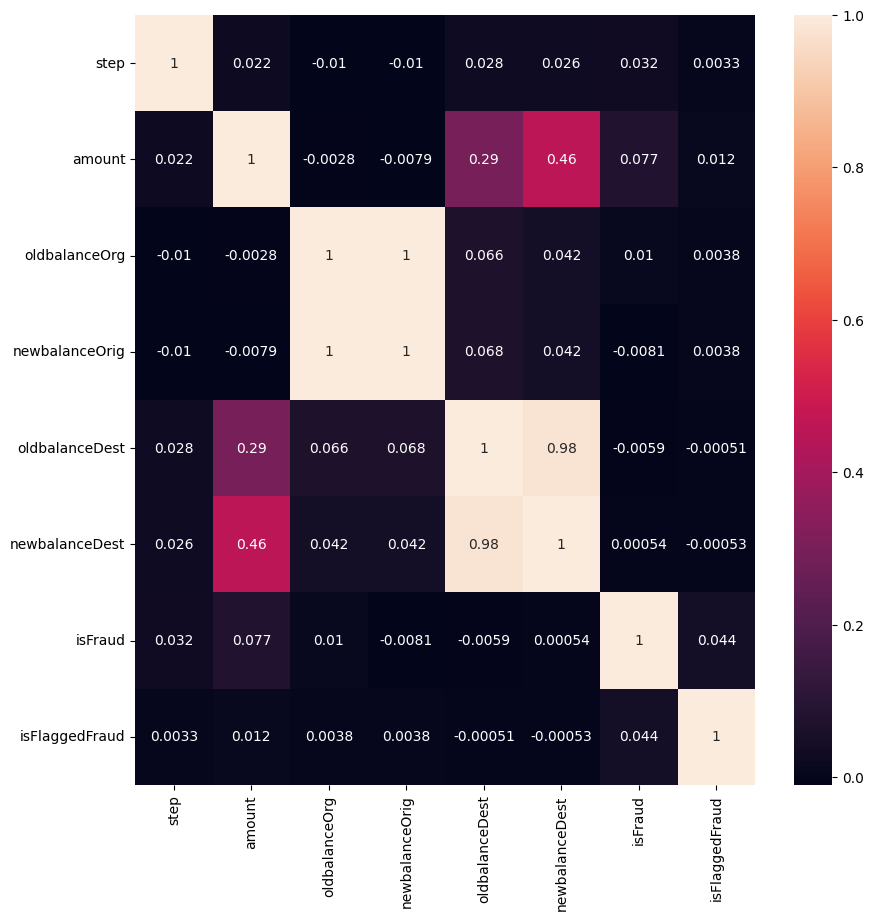

In [19]:
# Mapa de correlação das features.
lst= ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']
df_corr= df[lst].corr()
plt.figure(figsize= (10,10))
sns.heatmap(df_corr,annot= True)
plt.show()

* Alterando a Coluna Type, tipos de transferencias além de 'transfer' e 'cash_out' não são relevantes.

In [20]:
new_type = {'PAYMENT':'OTHERS', 'TRANSFER':'TRANSFER', 'CASH_OUT':'CASH_OUT', 'DEBIT':'OTHERS', 'CASH_IN':'OTHERS'}
df['type']=df['type'].map(new_type)
df['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

* Alterando remetenetes e destinatários para melhor identificar onde as fraudes acontecem.

In [21]:
data = df.copy()
data['type2'] = np.nan
data.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'), 'type2'] = 'CC'
data.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'), 'type2'] = 'CM'
data.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), 'type2'] = 'MC'
data.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), 'type2'] = 'MM'

In [22]:
data.drop(columns = ['nameOrig','nameDest','isFlaggedFraud'], axis = 'columns', inplace = True)

* Fraude == 1
* Não Fraude == 0

In [23]:
fraud_trans = data[data['isFraud'] == 1]
valid_trans = data[data['isFraud'] == 0]

print('Número de fraudes de acordo com cada tipo:\n', fraud_trans.type2.value_counts())
print('\n Número de transações válidas de acordo com cada tipo:\n', valid_trans.type2.value_counts())

Number of fraud transactions according to type are below:
 CC    8213
Name: type2, dtype: int64

 Number of valid transactions according to type are below:
 CC    4202912
CM    2151495
Name: type2, dtype: int64


In [24]:
data = pd.get_dummies(data, prefix = ['type', 'type2'], drop_first = False)

In [25]:
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_OTHERS,type_TRANSFER,type2_CC,type2_CM
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,1,0,0,1
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1,0,0,1
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,1,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,1,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,1,1,0


* Montagem das Features e Target

In [26]:
X = data
y = df['isFraud']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* Modelo XgBoost

In [29]:
model= xgb.XGBClassifier(max_depth = 3, n_jobs = -1, learning_rate = 0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

* Modelo Random Forest

In [31]:
rfc=RandomForestClassifier(n_estimators = 15, n_jobs = -1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, n_jobs=-1)

In [32]:
y_pred_rfc= rfc.predict(X_test)

In [33]:
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0])

Modelo Regressão Logistica


In [34]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [35]:
y_pred_lr= lr.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

Model Evaluation

In [36]:
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)

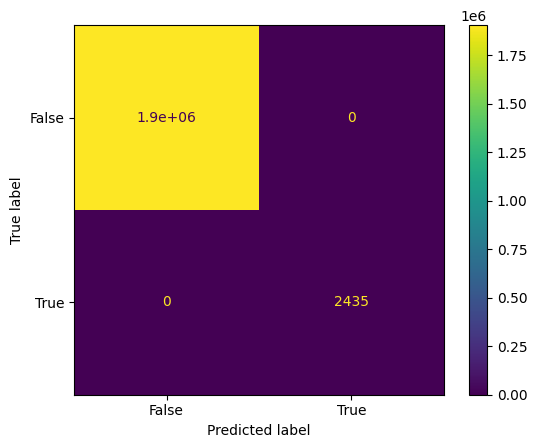

In [37]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [38]:
print("\n",metrics.classification_report(y_test,y_pred_lr))


               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       1.00      1.00      1.00      2435

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



# Análise de Crédito

* Recently issued a fresh loan to borrower Issued, Current, Fully Paid, Does not meet the credit policy. Status:Fully Paid

* (Category 1)
Current - All outstanding payments are paid up to date
Fully Paid - All outstanding payments are paid up and loan is finished
In Grace Period, Late (16-30 days), Late (31-120 days)

* (Category 2)
In Grace Period - 1-15 days passed after the due date
Late (16-30 days) - 16-30 days passed after the due date
Late (31-120 days) - 31-120 days passed after the due date
Charged Off , Does not meet the credit policy. Status:Charged Off, Default

* (Category 3)
Default - The borrower is not able to make outstanding payments for an extended period of time
Charged Off - A charge-off usually occurs when the creditor has deemed an outstanding debt is uncollectible

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [40]:
ds = pd.read_csv('/content/drive/MyDrive/creditFraud/loan.csv')

<ipython-input-40-8d142a41f3a2>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv('/content/drive/MyDrive/creditFraud/loan.csv')


In [41]:
ds

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [42]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [43]:
ds.drop(ds.columns.difference(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership',
                                         'annual_inc','verification_status','loan_status','purpose',]), 1, inplace=True)

<ipython-input-43-c6604e6942ae>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ds.drop(ds.columns.difference(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership',


In [44]:
ds.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
dtype: int64

In [45]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  float64
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  object 
 5   emp_length           842554 non-null  object 
 6   home_ownership       887379 non-null  object 
 7   annual_inc           887375 non-null  float64
 8   verification_status  887379 non-null  object 
 9   loan_status          887379 non-null  object 
 10  purpose              887379 non-null  object 
dtypes: float64(4), object(7)
memory usage: 74.5+ MB


In [46]:
ds

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other
...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,36 months,11.99,332.10,B,8 years,RENT,31000.0,Verified,Current,debt_consolidation
887375,24000.0,36 months,11.99,797.03,B,10+ years,MORTGAGE,79000.0,Verified,Current,home_improvement
887376,13000.0,60 months,15.99,316.07,D,5 years,RENT,35000.0,Verified,Current,debt_consolidation
887377,12000.0,60 months,19.99,317.86,E,1 year,RENT,64400.0,Source Verified,Current,debt_consolidation


In [47]:
ds.annual_inc = ds.annual_inc.fillna(0)
ds.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dtype: int64

* Create label Coloumn : Description about loan status

In [48]:
# binary classification
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period',
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

ds.loc[:, 'label'] = ds['loan_status'].apply(classify_label)
ds = ds.drop('loan_status', axis=1)

In [49]:
def SC_LabelEncoder1(text):
    grade_mapping = {"E": 1, "D": 2, "C": 3, "B": 4, "A": 5}
    return grade_mapping.get(text, 0)

def SC_LabelEncoder2(text):
    emp_length_mapping = {
        "< 1 year": 1, "1 year": 2, "2 years": 3, "3 years": 4, "4 years": 5,
        "5 years": 6, "6 years": 7, "7 years": 8, "8 years": 9, "9 years": 10,
        "10 years": 11, "10+ years": 12
    }
    return emp_length_mapping.get(text, 0)

def SC_LabelEncoder3(text):
    home_ownership_mapping = {"RENT": 1, "MORTGAGE": 2, "OWN": 3}
    return home_ownership_mapping.get(text, 0)

ds["grade"] = ds["grade"].apply(SC_LabelEncoder1)
ds["emp_length"] = ds["emp_length"].apply(SC_LabelEncoder2)
ds["home_ownership"] = ds["home_ownership"].apply(SC_LabelEncoder3)


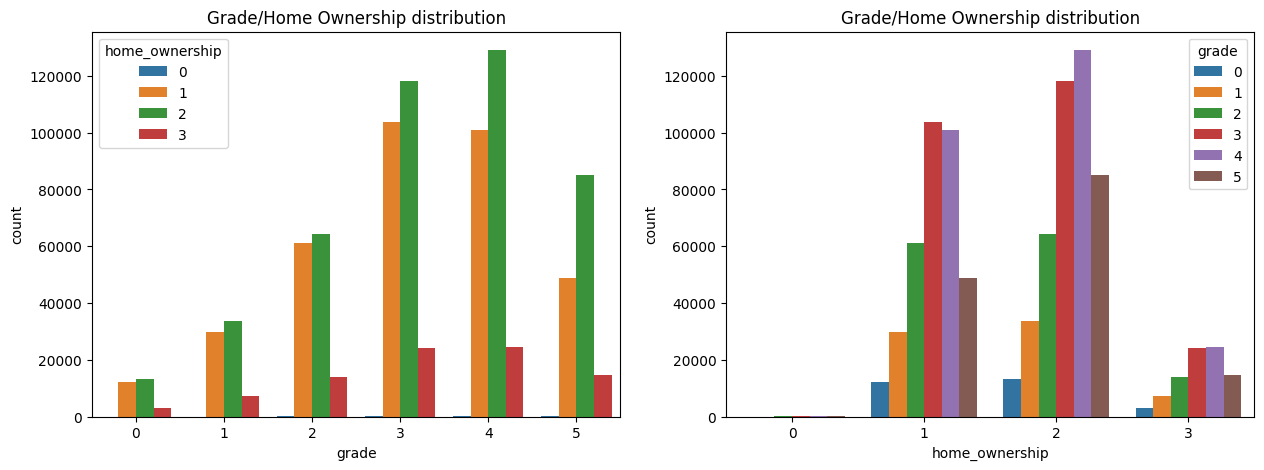

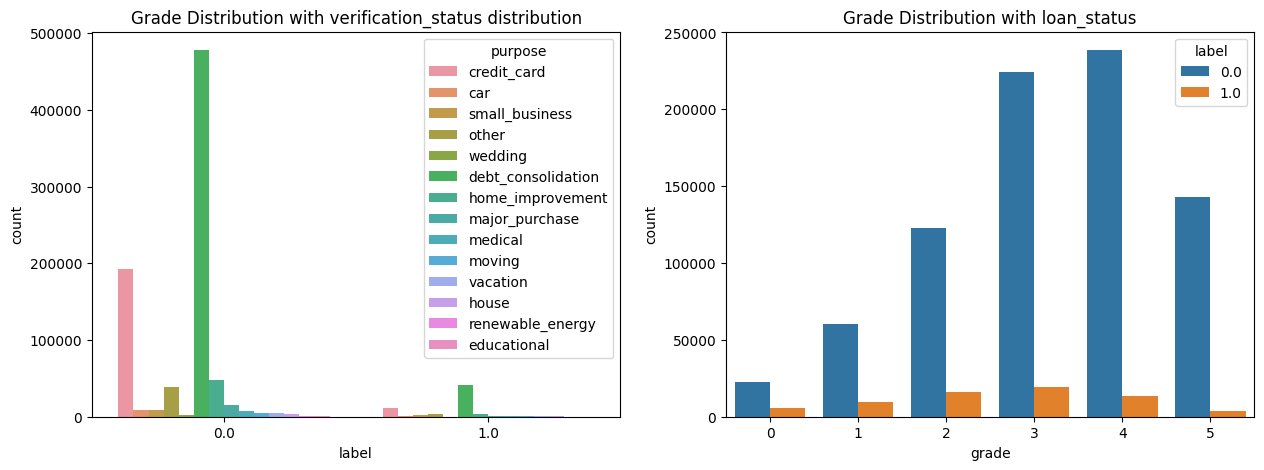

In [51]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=ds, x='grade', hue="home_ownership", ax=ax[0]).set_title("Grade/Home Ownership distribution");
sns.countplot(data=ds, x='home_ownership', hue='grade', ax=ax[1]).set_title("Grade/Home Ownership distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=ds, x='label', hue='purpose', ax=ax[0]).set_title("Grade Distribution with verification_status distribution");
sns.countplot(data=ds, x='grade', hue='label', ax=ax[1]).set_title("Grade Distribution with loan_status");

* The number of Borrowers with high grade will be small compared to low grade
* Most money borrowers' goals from labels 0 and 1 are debt consolidation
* The highest number of grades who were able to complete the loan was grade 4, while the most failed to complete the loan was grade 3

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

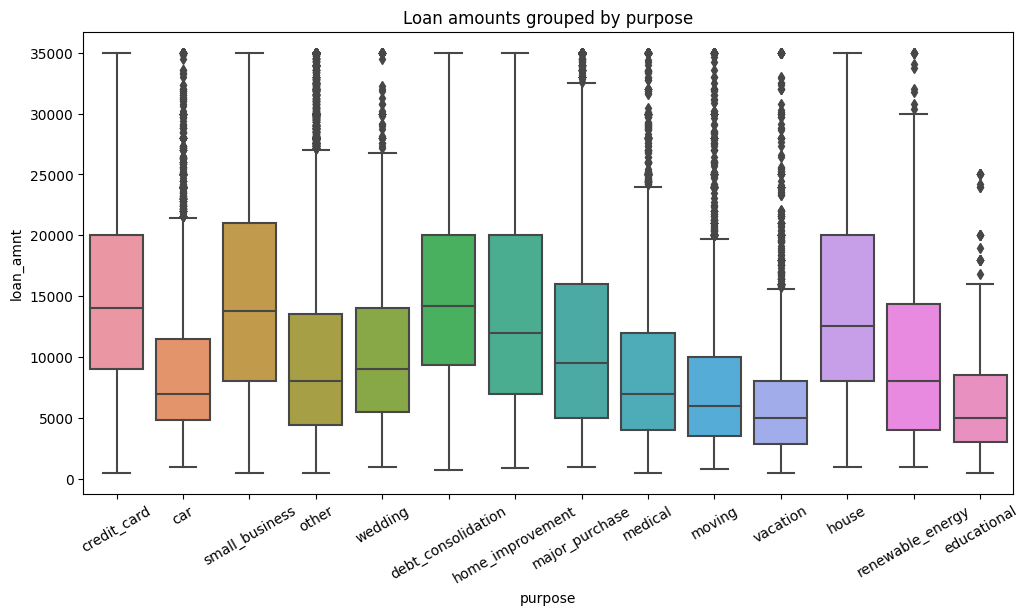

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=ds)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

* There are 5 highest categories for the amount of credit with the following purposes: Credit card, MSME business, debt consolidation, home improvement, and buying a house

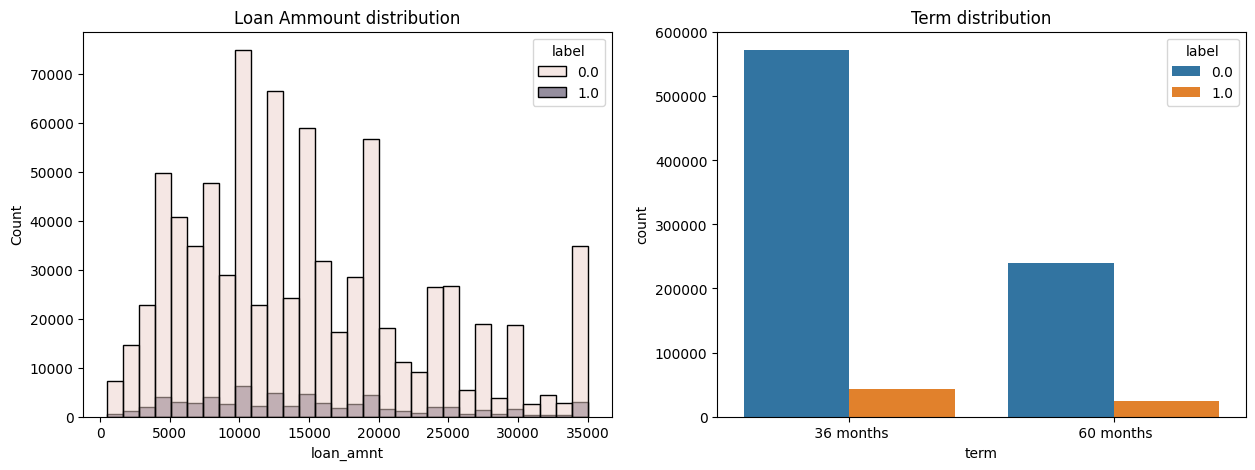

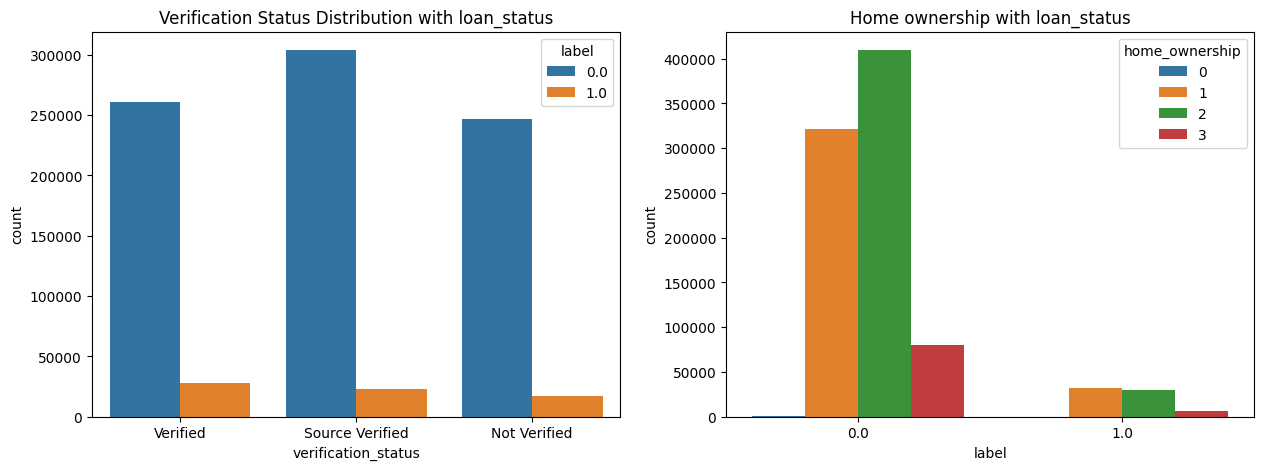

In [55]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(ds, x='loan_amnt',hue="label", bins=30, ax=ax[0]).set_title("Loan Ammount distribution");
sns.countplot(data=ds, x='term', hue="label", ax=ax[1]).set_title("Term distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=ds, hue='home_ownership', x='label', ax=ax[1]).set_title("Home ownership with loan_status");
sns.countplot(data=ds, x='verification_status', hue='label', ax=ax[0]).set_title("Verification Status Distribution with loan_status");

* The nominal value of the largest debt is 10000 USD
* The maximum maturity is 36 months, while for 60 months it is almost a third
* Most of the credits that can be paid in full are obtained from the "Verified" verification status

<ipython-input-56-aa7209d51939>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ds[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','purpose','label']].corr()
<ipython-input-56-aa7209d51939>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


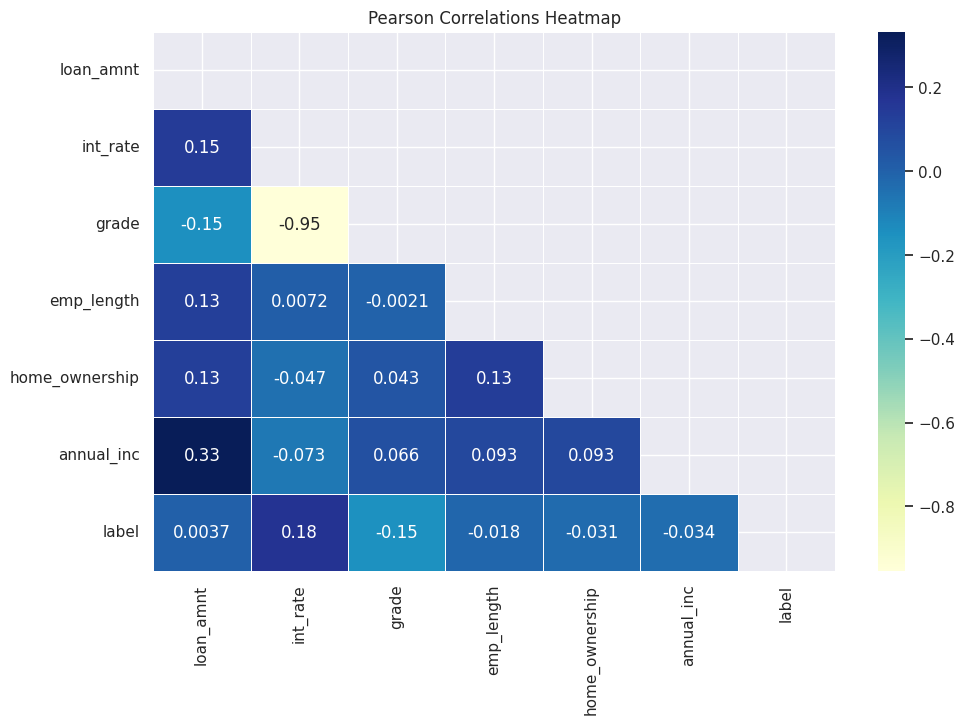

In [56]:
corr = ds[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','purpose','label']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

* The amount of credit is very dependent on the annual income of the borrower

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

In [60]:
# use LabelEncoder() to encode another category column:
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(ds[col])
    ds[col] = le.transform(ds[col])
ds.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000.0,0,10.65,162.87,4,12,1,24000.0,2,1,0.0
1,2500.0,1,15.27,59.83,3,1,1,30000.0,1,0,1.0
2,2400.0,0,15.96,84.33,3,12,1,12252.0,0,11,0.0
3,10000.0,0,13.49,339.31,3,12,1,49200.0,1,9,0.0
4,3000.0,1,12.69,67.79,4,2,1,80000.0,1,9,0.0


In [58]:
ds.label = ds.label.fillna(1)

* CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

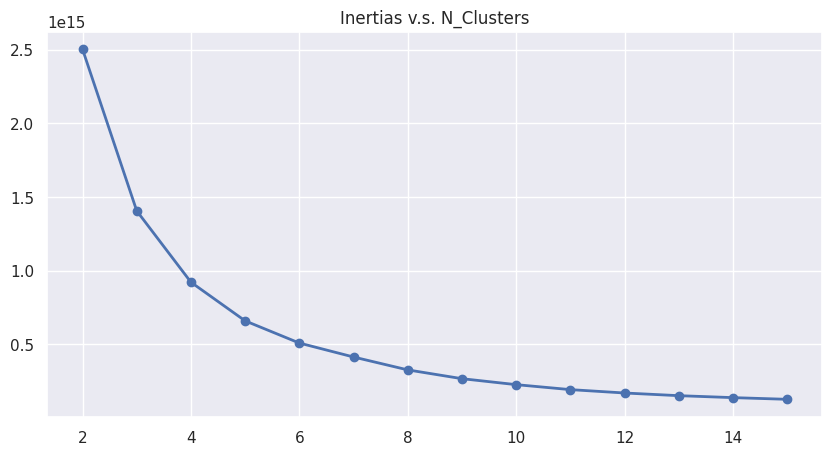

In [64]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(ds)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

* Analysis:¶
"Elbow" on the chart above is at 4. The number of clusters must be 4.

In [66]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(ds)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-67-ec6fcd0c7a34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered["Cluster"] = clusters


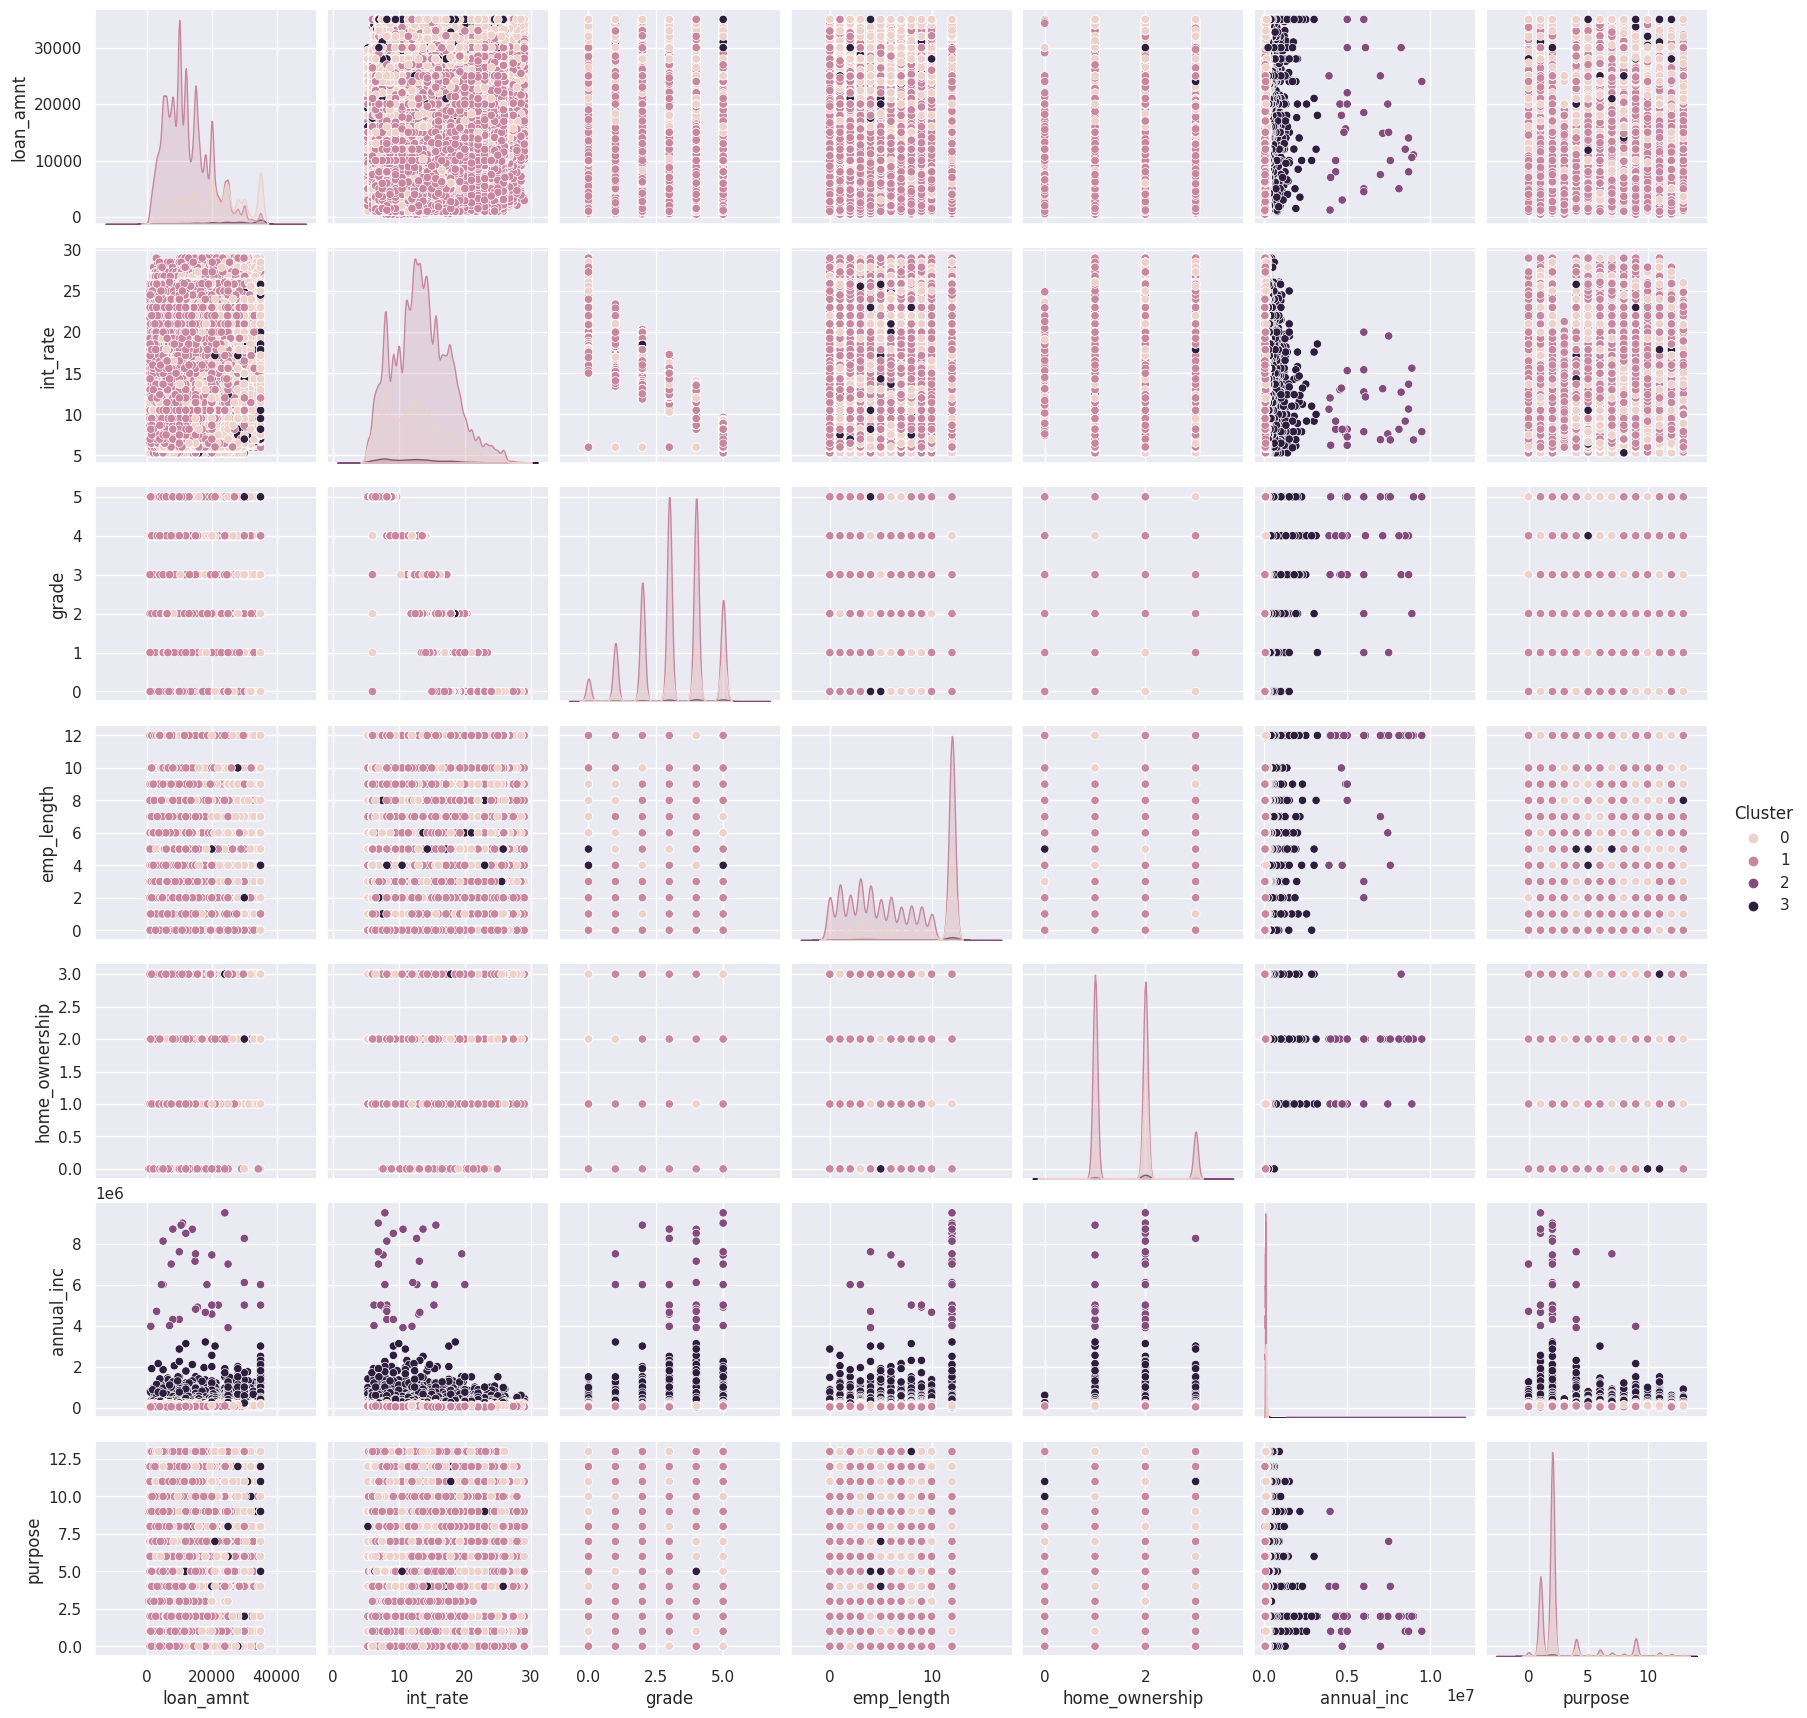

In [67]:
df_clustered = ds[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose']]
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose'
                           , "Cluster"]], hue="Cluster");

* Predicting Risk: Using the K-Nearest Neighbors Classification Model¶

In [68]:
X, y = ds.drop("label", axis=1), ds["label"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [69]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = f1_score(y_test, neigh.predict(X_test),average='micro')
    if score > max_score:
        max_k = k
        max_score = score

In [70]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

If we use K-Nearest Neighbors Classification, then the value of K is 30  to get the best prediction, then the average accuracy is  0.9142870021862111


* Since the KNN (K-Nearest Neighbors) Classification takes a lot of time and memory to predict, it is possible to use other ML models such as SVC, DecisionTree, RandomForest, and GaussianNaiveBayes.

* However, in this notebook, We use KNN Model Only, and it is done and has got a good accuracy = 91.4%